<a href="https://colab.research.google.com/github/LCaravaggio/NLP/blob/main/03_redes/4_NLP_UdeSA_2022_Intro_a_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial de PyTorch 
### Basado en notebook del curso de Stanford CS224n (Dilara Soylu, Ethan Chi)


"Autor": Juan Manuel Pérez + Google Translate
Usado en su curso de Maestría UDESA

In [ ]:
%%capture
!pip install torch

## Introducción
[PyTorch](https://pytorch.org/) es un framework de Deep Learning, uno más junto a TensorFlow, JaX, y Theano (QEPD).

In [ ]:
import torch
import torch.nn as nn

# Import pprint, module we use for making our print statements prettier
import pprint
pp = pprint.PrettyPrinter()

## Parte 1: Tensores

Los **tensores** son la base de PyTorch. Cada tensor es una matriz multidimensional; por ejemplo, una imagen cuadrada de 256x256 podría estar representada por un tensor '3x256x256', donde la primera dimensión representa el color. Así es como se crea un tensor:


In [ ]:
list_of_lists = [
  [1, 2, 3],
  [4, 5, 6],
]
print(list_of_lists)

[[1, 2, 3], [4, 5, 6]]


In [ ]:
# Initializing a tensor
data = torch.tensor([
                     [0.0, 1],    
                     [2, 3],
                     [4, 5]
                    ])
print(data)

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])


Cada tensor tiene un **tipo de dato**: usaremos mayormente dos, los flotantes (`torch.float32`) y los enteros (`torch.int`). Se puede especificar el tipo de datos explícitamente cuando se crea el tensor:

In [ ]:
data = torch.tensor([
                     [0, 1],    
                     [2, 3],
                     [4, 5]
                    ], dtype=torch.float32)
print(data)

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])


In [ ]:

data = torch.tensor([
                     [0.11111111, 1],    
                     [2, 3],
                     [4, 5]
                    ], dtype=torch.float32)
print(data)

tensor([[0.1111, 1.0000],
        [2.0000, 3.0000],
        [4.0000, 5.0000]])


Podemos crear algunos tensores especiales con ciertas funciones

In [ ]:
zeros = torch.zeros(2, 5)  # a tensor of all zeros
print(zeros) 

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [ ]:
ones = torch.ones(3, 4)   # a tensor of all ones
print(ones)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [ ]:
rr = torch.arange(1, 10) # range from [1, 10) 
print(rr)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])


Podemos aplicar operaciones vectoriales, como sumar 2 a todos los elementos

In [ ]:
rr + 2

tensor([ 3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
rr * 2

tensor([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [ ]:
a = torch.tensor([[1, 2], [2, 3], [4, 5]])      # (3, 2)
b = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])  # (2, 4)  (3, 4)

print("A es", a)
print("B es", b)
print("El producto matricial es", a.matmul(b))
print("También lo podemos calcular como", a @ b) # +, -, *, @

A es tensor([[1, 2],
        [2, 3],
        [4, 5]])
B es tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
El producto matricial es tensor([[11, 14, 17, 20],
        [17, 22, 27, 32],
        [29, 38, 47, 56]])
También lo podemos calcular como tensor([[11, 14, 17, 20],
        [17, 22, 27, 32],
        [29, 38, 47, 56]])


La **dimensión** de un tensor (a la que se puede acceder mediante `.shape`) se define como las dimensiones de la matriz.

In [ ]:
matr_2d = torch.tensor([
                        [1, 2, 3], 
                        [4, 5, 6]])
print(matr_2d.shape)
print(matr_2d)

torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
matr_3d = torch.tensor([[[1, 2, 3, 4], [-2, 5, 6, 9]], [[5, 6, 7, 2], [8, 9, 10, 4]], [[-3, 2, 2, 1], [4, 6, 5, 9]]])
print(matr_3d)
print(matr_3d.shape)

tensor([[[ 1,  2,  3,  4],
         [-2,  5,  6,  9]],

        [[ 5,  6,  7,  2],
         [ 8,  9, 10,  4]],

        [[-3,  2,  2,  1],
         [ 4,  6,  5,  9]]])
torch.Size([3, 2, 4])


Podemos cambiar la forma de los tensores para facilitar las operaciones sobre lotes (batches) aunque hay que tener cierto cuidado del ordne:

In [ ]:
rr = torch.arange(1, 16)
print("The shape is currently", rr.shape)
print("The contents are currently", rr)
print()
rr = rr.view(5, 3)
print("After reshaping, the shape is currently", rr.shape)
print("The contents are currently", rr)

The shape is currently torch.Size([15])
The contents are currently tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

After reshaping, the shape is currently torch.Size([5, 3])
The contents are currently tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])


Finally, you can also inter-convert tensors with **NumPy arrays**:

In [ ]:
X = (rr @ rr.T)

X

tensor([[ 14,  32,  50,  68,  86],
        [ 32,  77, 122, 167, 212],
        [ 50, 122, 194, 266, 338],
        [ 68, 167, 266, 365, 464],
        [ 86, 212, 338, 464, 590]])

In [ ]:
import numpy as np

# numpy.ndarray --> torch.Tensor:
arr = np.array([[1, 0, 5]])
data = torch.tensor(arr)
print("This is a torch.tensor", data)

# torch.Tensor --> numpy.ndarray:
new_arr = data.numpy()
print("This is a np.ndarray", new_arr)

This is a torch.tensor tensor([[1, 0, 5]])
This is a np.ndarray [[1 0 5]]


Las ventajas de tener datos así es que las operaciones pueden "vectorizarse" y hacerse más rápidas

In [ ]:
data = torch.arange(1, 36, dtype=torch.float32).reshape(5, 7)
print("Data is:", data)

# We can perform operations like *sum* over each row...
print("Taking the sum over columns:")
print(data.sum(dim=0))

# or over each column.
print("Taking thep sum over rows:")
print(data.sum(dim=1))

# Other operations are available:
print("Taking the stdev over rows:")
print(data.std(dim=1))


Data is: tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19., 20., 21.],
        [22., 23., 24., 25., 26., 27., 28.],
        [29., 30., 31., 32., 33., 34., 35.]])
Taking the sum over columns:
tensor([ 75.,  80.,  85.,  90.,  95., 100., 105.])
Taking thep sum over rows:
tensor([ 28.,  77., 126., 175., 224.])
Taking the stdev over rows:
tensor([2.1602, 2.1602, 2.1602, 2.1602, 2.1602])


In [ ]:
data.mean?

### Indexación

Puede acceder a elementos de un tensor utilizando el operador `[]`.


In [ ]:
# Initialize an example tensor
x = torch.Tensor([
                  [[1, 2], [3, 4]],
                  [[5, 6], [7, 8]], 
                  [[9, 10], [11, 12]] 
                 ])
x

tensor([[[ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]]])

In [ ]:
# Access the 0th element, which is the first row
x[0] # Equivalent to x[0, :]

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
x[:, 0]

tensor([[ 1.,  2.],
        [ 5.,  6.],
        [ 9., 10.]])

In [ ]:
matr = torch.arange(1, 16).view(5, 3)
print(matr)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])


In [ ]:
matr[0]

tensor([1, 2, 3])

In [ ]:
matr[0, :]

tensor([1, 2, 3])

In [ ]:
matr[:, 0]

tensor([ 1,  4,  7, 10, 13])

In [ ]:
matr[0:3]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
# Get the top left element of each element in our tensor
x[:, 0, 0]

tensor([1., 5., 9.])

Podemos obtener un valor escalar `Python` de un tensor con `item()`.

In [ ]:
matr

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])

In [ ]:
x[0, 0, 0]

tensor(1.)

In [ ]:
x[0, 0, 0].item()

1.0

## Ejercicio: igualdad de tensores

Para calcular la igualdad de tensores, utilizamos [torch.allclose](https://pytorch.org/docs/stable/generated/torch.allclose.html). ¿Qué pasa si usamos el operador `==`?

Chequear con `torch.allclose` que X@X sea igual a:

```python
torch.tensor([
    [ 1,  0,  0],
    [ 3,  4,  0],
    [ 6, 10,  9]])
```

In [ ]:
X = torch.tensor([
    [1, 0, 0],
    [1, 2, 0],
    [1, 2, 3],
])

expected = torch.tensor([
    [ 1,  0,  0],
    [ 3,  4,  0],
    [ 6, 10,  9]])
# TODO: completar
torch.allclose(
    X @ X,
    expected
)

True

In [ ]:
(X @ X) == expected

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

## Ejercicio: multiplicación de tensores

Una de las mayores virtudes de torch es la posibilidad de multiplicar de manera paralela muchísimas matrices 

`torch.bmm` permite multiplicar varias matrices de mismo tamaño apiladas en un tensor.


Leer la documentación de [torch.bmm](https://pytorch.org/docs/stable/generated/torch.bmm.html), y hallar un tensor Y tal que 
```python
np.allclose(torch.bmm(X, Y), torch.tensor([
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1], 
    ],
    [
        [4, 0, 0],
        [0, 4, 0],
        [0, 0, 4], 
    ],
    [
        [16, 0, 0],
        [0, 16, 0],
        [0, 0, 16], 
    ]
])


In [ ]:
"""
TODO: completar
"""
X = torch.tensor([
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1], 
    ],
    [
        [2, 0, 0],
        [0, 2, 0],
        [0, 0, 2], 
    ],
    [
        [4, 0, 0],
        [0, 4, 0],
        [0, 0, 4], 

    ]
])

Y = X

np.allclose(torch.bmm(X, Y), torch.tensor([
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1], 
    ],
    [
        [4, 0, 0],
        [0, 4, 0],
        [0, 0, 4], 
    ],
    [
        [16, 0, 0],
        [0, 16, 0],
        [0, 0, 16], 
    ]
]))


True

## Autograd

Pytorch es conocido por su función de diferenciación automática, lo que nos permite armar de manera fácil cualquier algoritmo de descenso por gradiente o similares. 

Podemos llamar al método `backward()` para pedirle a `PyTorch` que calcule los gradientes, que luego se almacenan en el atributo `grad`.

In [ ]:
# Create an example tensor
# requires_grad parameter tells PyTorch to store gradients
x = torch.tensor([2.], requires_grad=True)

# Print the gradient if it is calculated
# Currently None since x is a scalar
pp.pprint(x.grad)

None


In [ ]:
# Calculating the gradient of y with respect to x
y = x * x * 3 # 3x^2
y.backward()
pp.pprint(x.grad) # d(y)/d(x) = d(3x^2)/d(x) = 6x = 12

tensor([12.])


Let's run backprop from a different tensor again to see what happens.

In [ ]:
z = x * x * 3 # 3x^2
z.backward()
pp.pprint(x.grad)

tensor([24.])


In [ ]:
z = x * x * 3 # 3x^2
z.backward()
pp.pprint(x.grad)

tensor([36.])


¿Qué pasa acá?

Probemos ahora con varias variables

In [ ]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

Q = 3*a**3 - b**2

Q

tensor([-12.,  65.], grad_fn=<SubBackward0>)

In [ ]:
Q.backward()

RuntimeError: ignored

Esto es porque `Q` es un vector! Para obtener $\nabla{Q} = (\frac{\partial f}{\partial a},  \frac{\partial f}{\partial b})$

In [ ]:
Q.backward(gradient=torch.Tensor([1, 1]))

Acá las derivadas parciales se guardan en `a.grad` y `b.grad`

Como 

\begin{align*}
\frac{\partial f}{\partial a} &= 9 a^2 \\
\frac{\partial f}{\partial b} &= -2 b\\
\end{align*}

veamos si efectivamente pasó (recordar usar `allclose` para comparar floats)

In [ ]:
a.grad, b.grad

assert a.grad.allclose(9 * a ** 2)
assert b.grad.allclose(-2* b)

## Ejercicio

Calcular la derivada de $sen^2(x)$ para $ x = \pi $. Use la función `torch.sin`

Calcúlela analíticamente y chequee el resultado. ¿Da igual?

In [ ]:
"""
TODO: completar
"""
x = torch.tensor([torch.pi], requires_grad=True)
y = torch.sin(x) ** 2

y.backward()

In [ ]:
x.grad

tensor([1.7485e-07])

## Módulos de PyTorch

Hasta ahora hemos analizado los tensores, sus propiedades y operaciones básicas sobre tensores. Estos son especialmente útiles para familiarizarse si estamos construyendo las capas de nuestra red desde cero. 

Vamos a utilizar ahora los módulos predefinidos de `torch.nn` de `PyTorch`. Luego uniremos estos bloques para crear redes complejas.

In [ ]:
import torch.nn as nn

### **Capa lineal**

La base de las redes neuronales. 

Podemos usar `nn.Linear(H_in, H_out)` para crear una capa lineal, donde `H_in` es la dimensión de entrada y `H_out` la dimensión de salida.

Esta capa tomará una matriz de dimensiones `(N, k, H_in)` y generará una matriz de `(N, k, H_out)`, con $k$ cualquier dimensión. 

La capa lineal realiza la operación `Ax+b`, donde `A` y `b` se inicializan aleatoriamente. Si no queremos que la capa lineal aprenda $b$ (la ordenada al origen o `bias`), podemos inicializar nuestra capa con `bias=False`.

In [ ]:
# Create the inputs
input = torch.ones(2,3,4)
# Acá tenemos (2, 3, 4), siendo 4 la dimensión de entrada
# Creemos una capa que tenga entrada 4 valores y los convierta a 2
linear = nn.Linear(4, 2)


linear_output = linear(input)

# Ejercicio: qué dimensión tiene linear_output?
linear_output.shape # => (2, 3, 2)

torch.Size([2, 3, 2])

In [ ]:
torch.relu(linear(input))

tensor([[[0.4518, 0.3999],
         [0.4518, 0.3999],
         [0.4518, 0.3999]],

        [[0.4518, 0.3999],
         [0.4518, 0.3999],
         [0.4518, 0.3999]]], grad_fn=<ReluBackward0>)

In [ ]:
list(linear.parameters()) # Ax + b

## Otras capas
Hay varias otras capas preconfiguradas en el módulo `nn`. Algunos ejemplos de uso común son `nn.Conv2d`, `nn.ConvTranspose2d`, `nn.BatchNorm1d`, `nn.BatchNorm2d`, `nn.Upsample` y `nn.MaxPool2d`, entre muchos otros. Aprenderemos más sobre esto a medida que avancemos en el curso. Por ahora, lo único importante para recordar es que podemos tratar cada una de estas capas como componentes plug and play: proporcionaremos las dimensiones requeridas y `PyTorch` se encargará de configurarlas y hacer toda la magia

### **Capa de función de activación**
También podemos usar el módulo `nn` para aplicar funciones de activación a nuestros tensores. Las funciones de activación se utilizan para agregar no linealidad a nuestra red. Algunos ejemplos de funciones de activación son `nn.ReLU()`, `nn.Sigmoid()` y `nn.LeakyReLU()`. Las funciones de activación operan en cada elemento por separado, por lo que la forma de los tensores que obtenemos como salida es la misma que la que pasamos.

In [ ]:
sigmoid = nn.Sigmoid()
output = sigmoid(linear_output)
output

tensor([[[0.6111, 0.5987],
         [0.6111, 0.5987],
         [0.6111, 0.5987]],

        [[0.6111, 0.5987],
         [0.6111, 0.5987],
         [0.6111, 0.5987]]], grad_fn=<SigmoidBackward0>)

En versiones más actuales de `torch`, podemos usar directamente `torch.sigmoid` o `torch.relu`

In [ ]:
torch.relu(linear_output)

tensor([[[0.4518, 0.3999],
         [0.4518, 0.3999],
         [0.4518, 0.3999]],

        [[0.4518, 0.3999],
         [0.4518, 0.3999],
         [0.4518, 0.3999]]], grad_fn=<ReluBackward0>)

In [ ]:
torch.sigmoid(linear_output)

tensor([[[0.6111, 0.5987],
         [0.6111, 0.5987],
         [0.6111, 0.5987]],

        [[0.6111, 0.5987],
         [0.6111, 0.5987],
         [0.6111, 0.5987]]], grad_fn=<SigmoidBackward0>)

¿Qué era la función ReLU?


### Módulos personalizados

En lugar de utilizar los módulos predefinidos, también podemos crear los nuestros propios ampliando la clase `nn.Module`. Por ejemplo, podemos construir `nn.Linear` (que también extiende `nn.Module`) por nuestra cuenta usando el tensor presentado anteriormente. También podemos crear módulos nuevos y más complejos, como una red neuronal personalizada. 

Para crear un módulo personalizado, lo primero que tenemos que hacer es extender el `nn.Module`. Luego podemos inicializar nuestros parámetros en la función `__init__`, comenzando con una llamada a la función `__init__` de la superclase. Todos los atributos de clase que definimos, que son objetos de módulo `nn`, se tratan como parámetros, que se pueden aprender durante el entrenamiento. 

También se espera que todas las clases que extiendan `nn.Module` implementen una función `forward(x)`, donde `x` es un tensor. Esta es la función que se llama cuando se pasa un parámetro a nuestro módulo, como en `model(x)`.

In [ ]:
from torch.nn import functional as F

class MultilayerPerceptron(nn.Module):

  def __init__(self, input_size, hidden_size):
    # Call to the __init__ function of the super class
    super().__init__()
    # Defining of our layers
    self.linear = nn.Linear(input_size, hidden_size)
    self.linear2 = nn.Linear(hidden_size, input_size)
    
  def forward(self, x):
    linear = self.linear(x)
    hidden = torch.relu(linear)
    linear2 = self.linear2(hidden)
    
    return linear2

In [ ]:
# Make a sample input
input = torch.randn(2, 5)

# Create our model
model = MultilayerPerceptron(5, 3)

# Pass our input through our model
model(input).shape

tensor([[ 0.6273,  0.4350,  0.6156, -0.4774, -0.0627],
        [ 0.3836, -0.3456,  0.3085, -0.7619, -0.2776]],
       grad_fn=<AddmmBackward0>)

Podemos inspeccionar los parámetros de nuestro modelo con los métodos `named_parameters()` y `parameters()`.

In [ ]:
list(model.named_parameters())

[('linear.weight', Parameter containing:
  tensor([[-0.4433,  0.0630, -0.4351,  0.1178,  0.2064],
          [ 0.0663,  0.0594, -0.1578, -0.0931, -0.1395],
          [ 0.3878, -0.1586,  0.0323,  0.2516, -0.0278]], requires_grad=True)),
 ('linear.bias', Parameter containing:
  tensor([-0.0422, -0.0523,  0.1850], requires_grad=True)),
 ('linear2.weight', Parameter containing:
  tensor([[ 0.1524, -0.2727,  0.4581],
          [ 0.5249, -0.5233, -0.1585],
          [ 0.5717,  0.2840, -0.4711],
          [ 0.2143, -0.1316, -0.2318],
          [ 0.2245, -0.0786,  0.0862]], requires_grad=True)),
 ('linear2.bias', Parameter containing:
  tensor([ 0.3795,  0.0766,  0.3103, -0.5761, -0.2599], requires_grad=True))]

## Optimización

Hemos mostrado cómo se calculan los gradientes con la función `backward()`. Tener los gradientes no es suficiente para que nuestros modelos aprendan. También necesitamos saber cómo actualizar los parámetros de nuestros modelos. Aquí es donde entran los optimizadores. 

El módulo `torch.optim` contiene varios optimizadores que podemos usar. Algunos ejemplos populares son `optim.SGD` y `optim.Adam`. Al inicializar los optimizadores, pasamos los parámetros de nuestro modelo, a los que se puede acceder con `model.parameters()`, indicando a los optimizadores qué valores optimizará. Optimizers también tiene un parámetro de tasa de aprendizaje (`lr`), que determina el tamaño de la actualización que se realizará en cada paso. Diferentes optimizadores también tienen diferentes hiperparámetros.

In [ ]:
import torch.optim as optim

Después de tener nuestra función de optimización, podemos definir una "pérdida" para la que queremos optimizar. Podemos definir la pérdida nosotros mismos o usar una de las funciones de pérdida predefinidas en `PyTorch`, como `nn.BCELoss()`. ¡Pongamos todo junto ahora! 

Vamos a hacer un ejemplo de juguete: aproximar la función `seno` entre -10 y 10

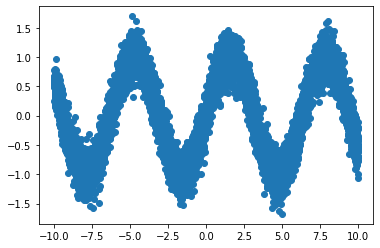

In [ ]:
# Create the y data
#x = y + torch.randn_like(y)
#y = torch.ones(10, 5)
import matplotlib.pyplot as plt


# Creo una distribución uniforme entre -10 y 10 (leer documentación de torch.rand)
x = torch.rand(10_000, 1) * 20 - 10
# x += 0.1 * torch.randn_like(x)

y = torch.sin(x).reshape(-1, 1)
#Agrego ruido normal
y += 0.2 * torch.randn_like(y)

# Add some noise to our goal y to generate our x
# We want out model to predict our original data, albeit the noise
plt.scatter(x, y)

Vamos a intentar aproximarlo con una función

$$
h = ReLU(W_1 x + b_1) \\
\hat{y} = tanh(W_2 h + b_2)
$$

In [ ]:
from torch.nn import functional as F

class MultilayerPerceptron(nn.Module):

  def __init__(self, input_size, hidden_size):
    # Call to the __init__ function of the super class
    super().__init__()

    # Bookkeeping: Saving the initialization parameters
    self.input_size = input_size 
    self.hidden_size = hidden_size 

    # Defining of our layers
    self.linear = nn.Linear(self.input_size, self.hidden_size)
    self.linear2 = nn.Linear(self.hidden_size, self.input_size)
    
  def forward(self, x):
    linear = self.linear(x)
    hidden = torch.relu(linear)
    linear2 = self.linear2(hidden)
    
    return torch.tanh(linear2)

Primero: definimos nuestra función de pérdida. Como es un problema de regresión, usamos la pérdida de cuadrados mínimos

In [ ]:

# Define loss using a predefined loss function
loss_function = nn.MSELoss()

Creamos nuestro modelo

In [ ]:
# Instantiate the model
model = MultilayerPerceptron(1, 30)


Creamos el optimizador, que va a estar recibiendo como parámetros...los parámetros del modelo, y el learning rate

In [ ]:
# Define the optimizer
sgd = optim.SGD(model.parameters(), lr=3e-2)


A ver qué tal está haciendo ahora:

- Hacemos forward pass llamando al modelo con la entrada
- Calculamos la pérdida

In [ ]:



# Calculate how our model is doing now
y_pred = model(x)
loss_function(y_pred, y).item()

1.2579079866409302

In [ ]:
x.shape, y.shape

(torch.Size([32, 1]), torch.Size([32, 1]))

Creo mi "conjunto de train" concatenando `x` e `y`

In [ ]:

train_dataset = torch.cat([x, y], dim=1)

train_dataset

tensor([[-0.6360, -0.7704],
        [-5.6711,  0.6578],
        [ 7.0288,  0.7910],
        [-1.9894, -0.6073],
        [ 0.8912,  0.5639],
        [ 1.6653,  1.3826],
        [-5.5041,  0.7643],
        [ 3.2499,  0.4194],
        [-8.4098, -0.7930],
        [ 1.6378,  0.9221],
        [ 5.4543, -0.9796],
        [ 1.6981,  0.8567],
        [ 7.2074,  0.8218],
        [ 5.3098, -1.0778],
        [-9.6790,  0.3497],
        [ 0.9039,  0.9003],
        [ 6.6985,  0.2110],
        [ 4.4506, -0.9588],
        [-0.2893, -0.3334],
        [-8.3768, -0.7889],
        [ 6.2231, -0.2377],
        [-1.6435, -1.0692],
        [-5.4538,  0.5664],
        [-3.9117,  0.6356],
        [-9.7245,  0.4114],
        [-6.3255, -0.3832],
        [-1.4261, -0.9955],
        [-8.1363, -0.7689],
        [-8.3461, -0.8619],
        [-7.2530, -1.0342],
        [-0.0786,  0.1360],
        [ 9.9675, -0.5453]])

## Batches

¿Cómo separamos nuestros datos en lotes/batches? con `DataLoader`s!

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

Un dataloader es un iterable: podemos recorrerlo:

In [ ]:
for batch in train_dataloader:
    print(batch.size())

torch.Size([32, 2])


Si queremos ver qué pinta tiene un batch, podemos usar `next(iter(train_dataloader))` (!)

In [ ]:
batch = next(iter(train_dataloader))


batch

tensor([[ 1.6653,  1.3826],
        [-1.6435, -1.0692],
        [-8.4098, -0.7930],
        [ 5.3098, -1.0778],
        [-5.6711,  0.6578],
        [ 1.6378,  0.9221],
        [ 5.4543, -0.9796],
        [-9.7245,  0.4114],
        [ 1.6981,  0.8567],
        [ 0.9039,  0.9003],
        [-5.5041,  0.7643],
        [-9.6790,  0.3497],
        [ 4.4506, -0.9588],
        [-0.0786,  0.1360],
        [-1.9894, -0.6073],
        [-8.1363, -0.7689],
        [ 6.2231, -0.2377],
        [-1.4261, -0.9955],
        [-5.4538,  0.5664],
        [ 6.6985,  0.2110],
        [-0.6360, -0.7704],
        [ 3.2499,  0.4194],
        [ 9.9675, -0.5453],
        [-8.3768, -0.7889],
        [-8.3461, -0.8619],
        [-7.2530, -1.0342],
        [-6.3255, -0.3832],
        [-3.9117,  0.6356],
        [ 7.0288,  0.7910],
        [-0.2893, -0.3334],
        [ 0.8912,  0.5639],
        [ 7.2074,  0.8218]])

La entrada es la primer columna, así que nos quedamos con eso. Lo convertimos a una columna con `view`

In [ ]:
batch

tensor([[ 1.6653,  1.3826],
        [-1.6435, -1.0692],
        [-8.4098, -0.7930],
        [ 5.3098, -1.0778],
        [-5.6711,  0.6578],
        [ 1.6378,  0.9221],
        [ 5.4543, -0.9796],
        [-9.7245,  0.4114],
        [ 1.6981,  0.8567],
        [ 0.9039,  0.9003],
        [-5.5041,  0.7643],
        [-9.6790,  0.3497],
        [ 4.4506, -0.9588],
        [-0.0786,  0.1360],
        [-1.9894, -0.6073],
        [-8.1363, -0.7689],
        [ 6.2231, -0.2377],
        [-1.4261, -0.9955],
        [-5.4538,  0.5664],
        [ 6.6985,  0.2110],
        [-0.6360, -0.7704],
        [ 3.2499,  0.4194],
        [ 9.9675, -0.5453],
        [-8.3768, -0.7889],
        [-8.3461, -0.8619],
        [-7.2530, -1.0342],
        [-6.3255, -0.3832],
        [-3.9117,  0.6356],
        [ 7.0288,  0.7910],
        [-0.2893, -0.3334],
        [ 0.8912,  0.5639],
        [ 7.2074,  0.8218]])

In [ ]:
x = batch[:, 0].view(-1, 1)
y = batch[:, 1].view(-1, 1)
y_pred = model(x)

Esa es nuestra predicción para el batch. Calculamos la pérdida con...

In [ ]:
loss = loss_function(y_pred, y)

loss

tensor(1.2579, grad_fn=<MseLossBackward0>)

## Entrenamiento

Vamos a juntar todo esto: iteramos por todos los baches por 30 épocas y vamos ajustando el modelo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


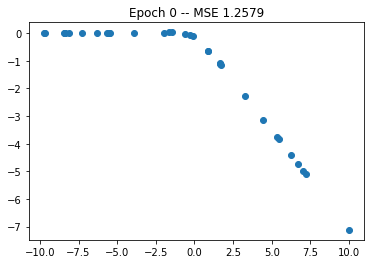

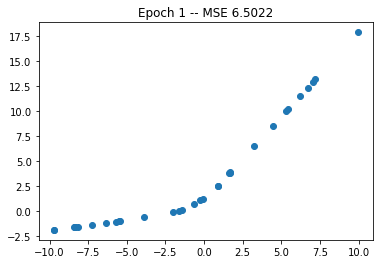

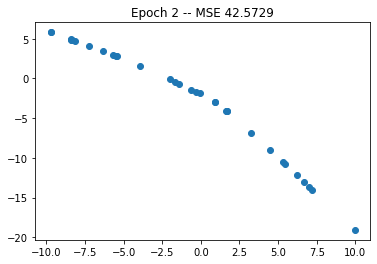

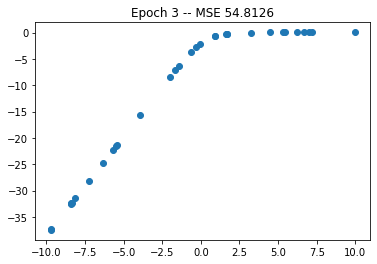

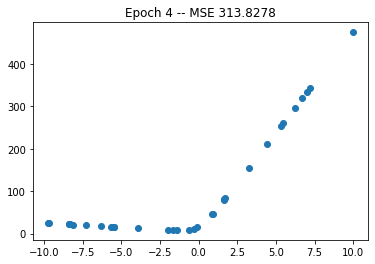

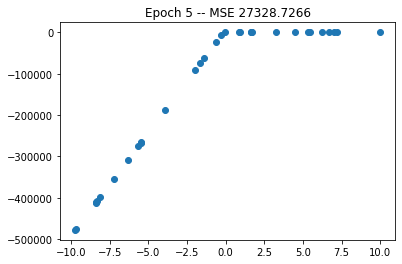

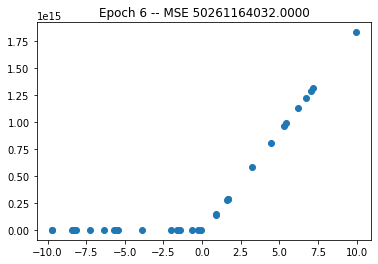

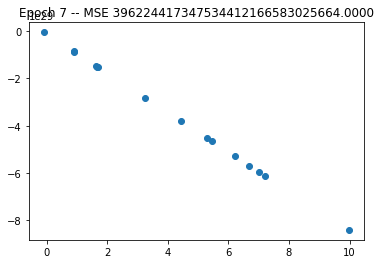

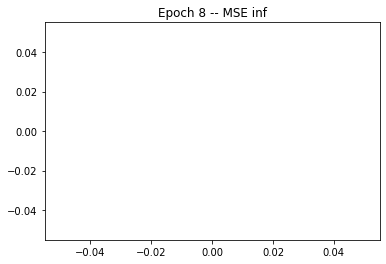

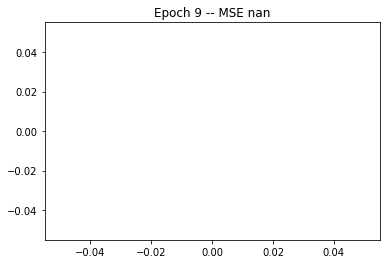

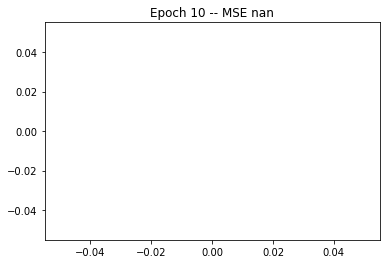

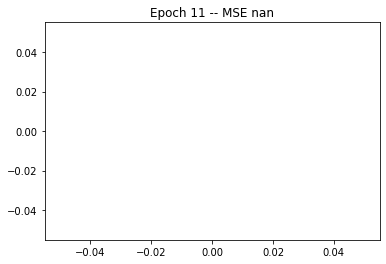

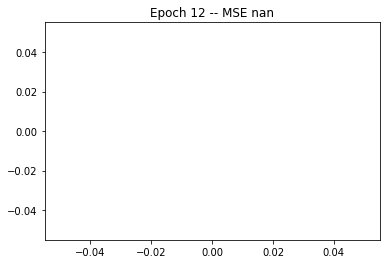

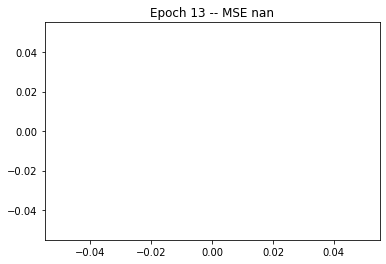

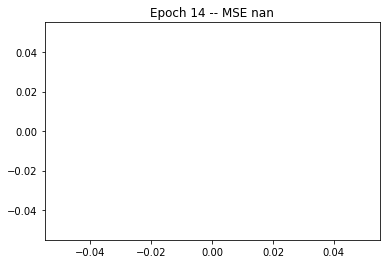

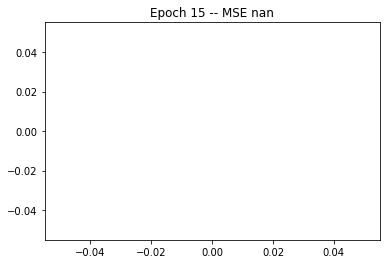

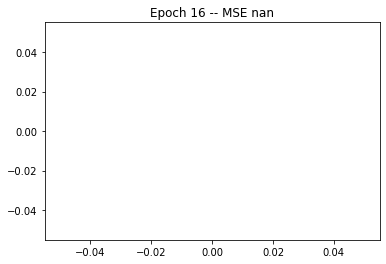

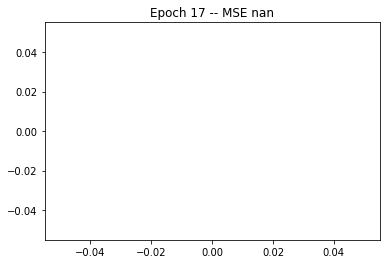

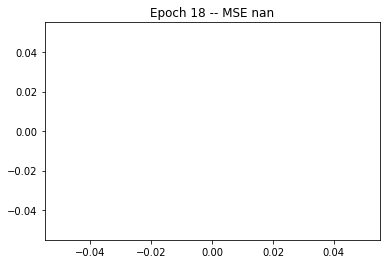

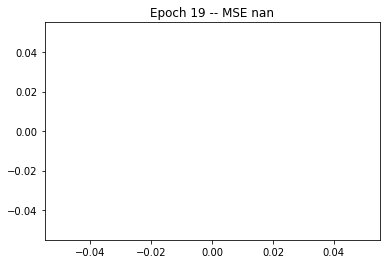

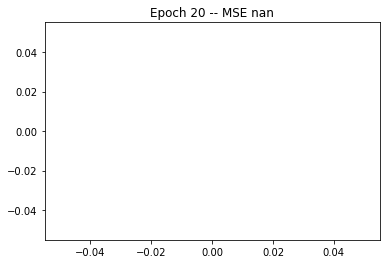

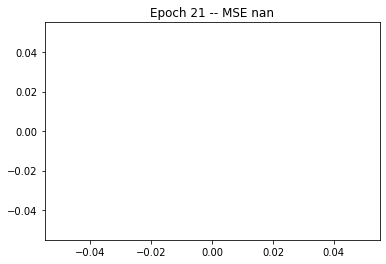

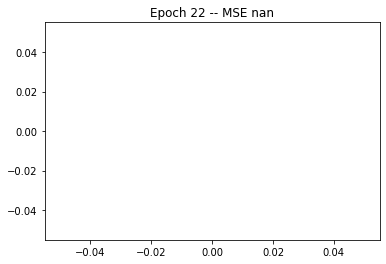

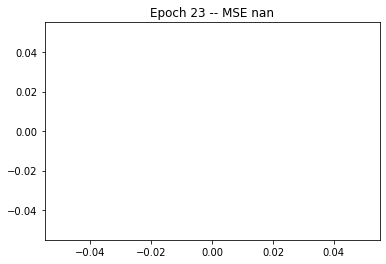

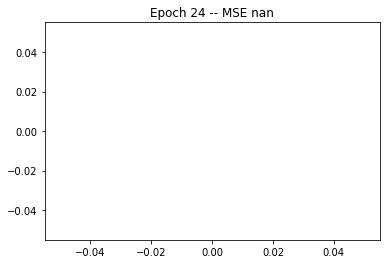

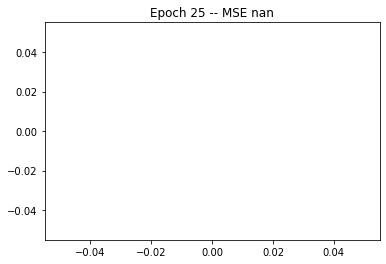

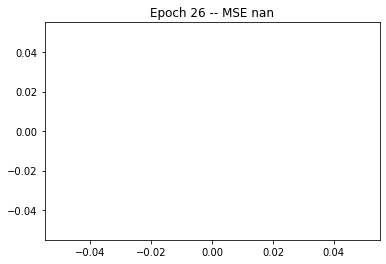

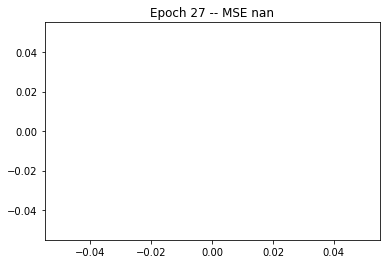

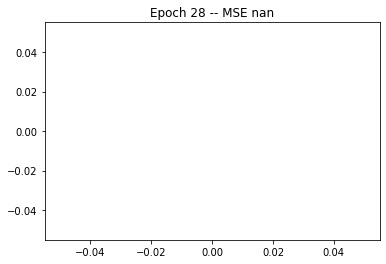

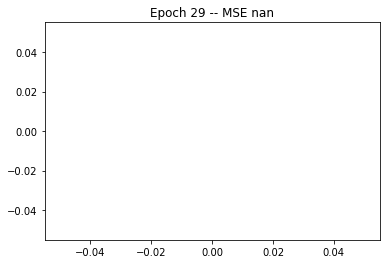

In [ ]:
from torch.utils.data import DataLoader



# Dataloader: el que convierte nuestro conjunto de datos en pequeños lotes/batches

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# Set the number of epoch, which determines the number of training iterations
n_epoch = 30

# Define loss using a predefined loss function
loss_function = nn.MSELoss()

for epoch in range(n_epoch):
  avg_loss = 0.0
  for batch in train_dataloader:
    x_batch, y_batch = batch[:, 0].view(-1, 1), batch[:, 1].view(-1, 1)
    # Set the gradients to 0
    sgd.zero_grad()
    # Get the model predictions
    y_pred = model(x_batch)

    # Get the loss
    loss = loss_function(y_pred, y_batch)
  # Compute the gradients
    loss.backward()

    avg_loss += loss.item() 
    # Take a step to optimize the weights
    sgd.step()
  
  avg_loss /= len(train_dataloader)

  

  plt.figure()
  y_pred = model(train_dataset[:, 0].view(-1, 1))
  plt.scatter(train_dataset[:, 0].detach().cpu(), y_pred.detach().cpu().view(-1, 1))
  plt.title(f"Epoch {epoch} -- MSE {avg_loss:.4f}")



Bastante bien!